In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]

# Wygładzanie obrazów

## Cele

- Rozmyty obraz z różnymi filtrami
- Zastosowanie niestandardowych filtrów do obrazów (konwolucja 2D)

## 2D Convolution
OpenCV udostępnia funkcję, cv2.filter2D(), która dokonuje splotu jądra z obrazem. Jako przykład, wypróbujemy filtr uśredniający na obrazie. Jądro filtru uśredniającego 5x5 można zdefiniować w następujący sposób:

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


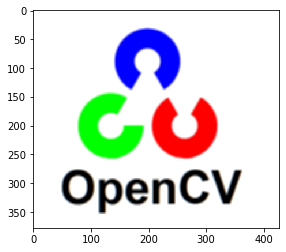

In [18]:
size = 5
kernel = 1 / size**2 * np.ones((size, size))
print(kernel)

img = cv2.imread('images/opencv_logo.png')

output = cv2.filter2D(img, cv2.CV_8U, kernel)
plt.imshow(output)

## Rozmycie obrazu

Rozmycie obrazu uzyskuje się przez operację konwolucji przy użyciu odpowiedniego filtra. Jest to przydatne przy usuwaniu szumów. W rzeczywistości usuwa z obrazu treść o wysokiej częstotliwości (np.: szumy, krawędzie), co powoduje rozmycie brzegów po zastosowaniu filtra. OpenCV oferuje głównie cztery rodzaje technik rozmycia.

### 1. Uśrednianie
Odbywa się to poprzez operację konwolucji za pomocą _znormalizowanego filtra skrzynkowego_ (Nie trzeba tego pamiętać). Pobiera on po prostu średnią wszystkich pikseli znajdujących się pod obszarem filtra i zastępuje centralny element tą średnią. Odbywa się to za pomocą funkcji cv2.blur(). Powinniśmy określić szerokość i wysokość jądra. Tak wyglądałby filtr pudełkowy 3x3:

$$\begin{equation}
K=\frac{1}{9}\left[\begin{array}{lll}{1} & {1} & {1} \\ {1} & {1} & {1} \\ {1} & {1} & {1}\end{array}\right]
\end{equation}$$


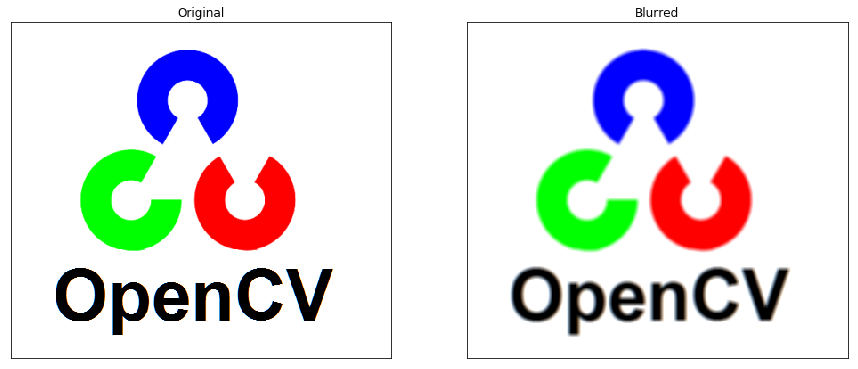

In [4]:
img = cv2.imread('images/opencv_logo.png')

blur = cv2.blur(img, (5,5))

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur), plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### 2. Filtrowanie gaussowskie

W tym podejściu, zamiast filtra skrzynkowego składającego się z jednakowych współczynników filtracji, stosuje się filtr gaussowski. Odbywa się to za pomocą funkcji cv2.GaussianBlur(). Należy określić szerokość i wysokość jądra, która powinna być __dodatnia i nieparzysta__. 

Powinniśmy również określić odchylenie standardowe w kierunkach X i Y, odpowiednio sigmaX i sigmaY. Jeśli podano tylko sigmaX, sigmaY jest rozumiane jako równe sigmaX. 

Jeśli oba podane są jako zera, są obliczane na podstawie wielkości jądra. Filtrowanie gaussowskie jest bardzo skuteczne w usuwaniu szumów gaussowskich z obrazu.

Jeśli chcesz, możesz utworzyć jądro gaussowskie z funkcją cv2.getGaussianKernel().

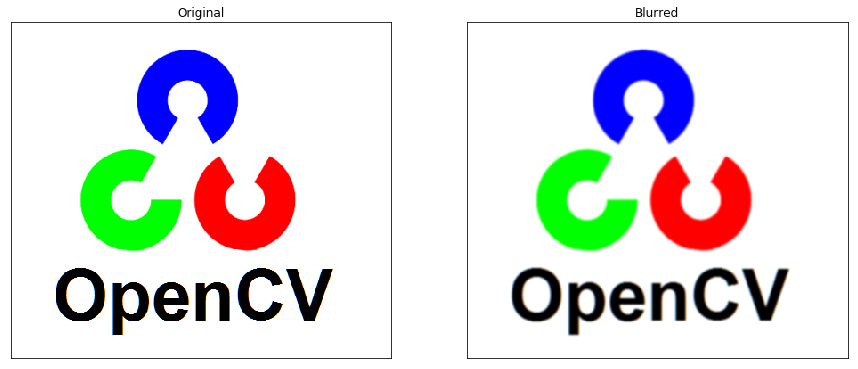

In [7]:
img = cv2.imread('images/opencv_logo.png')

blur = cv2.GaussianBlur(img,(5,5), 0)

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur), plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()